In [1]:
import torch
import numpy as np
from models.generator import DepthNet
from models.generator import PoseNet
from torchvision import transforms
from PIL import Image
from models.discriminator import Discriminator
# from torchsummary import summary
import matplotlib.pyplot as plt
# import open3d as o3d
import sys
from models.wrap import inverse_warp
from models.GAN import DPGAN
from models.cor_loss import CORLoss,PhotometricLoss
import torchvision
from models.dataloader import DepthDataset
from torch.utils.data import Dataset, DataLoader

torch.Size([1, 3, 352, 1216])
torch.Size([1, 352, 1216])


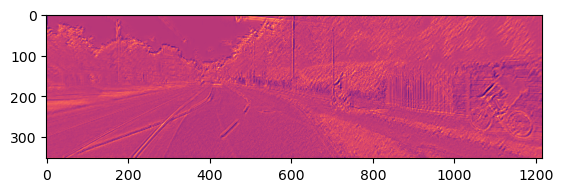

In [2]:
img = Image.open("images/1.png")
transform = transforms.Compose([
    transforms.Resize((352,1216)),
    transforms.ToTensor(),
])
img = transform(img)
img = img[None, :, :, :]
print(img.shape)

model = DepthNet()
depth = model(img)
depth = torch.squeeze(depth, dim=0)
print(depth.shape)

plt.imshow(np.transpose(depth.detach().numpy(), (1,2,0)), cmap="magma");

In [3]:
# depth = torch.rand(1,352,1216)/100000000000


# im_frame = Image.open('true_depth.png').convert('L')
# np_frame = (np.array(im_frame).astype(np.double))
# depth = torch.from_numpy(np_frame)
# depth = depth[None,:,:].float()
# print(depth)

# pose_left = torch.tensor([[ 0, 0, 100, 0, 0, 0]])
# intrinsics = torch.tensor([[721.5377, 0, 596.5593],
#                                            [0, 721.5377, 149.854],
#                                            [0, 0, 1]])
# rep,val,grid = inverse_warp(img, depth, pose_left,intrinsics,rotation_mode='euler', padding_mode='zeros')
# rep_0= torch.squeeze(rep[0], dim=0)
# plt.imshow(np.transpose(rep_0.detach().numpy(), (1,2,0)));

In [4]:
# cor_loss = PhotometricLoss()
# cor_loss(img,rep)

tensor(133.6790, grad_fn=<MeanBackward0>) tensor(0.8036, grad_fn=<StdBackward0>)


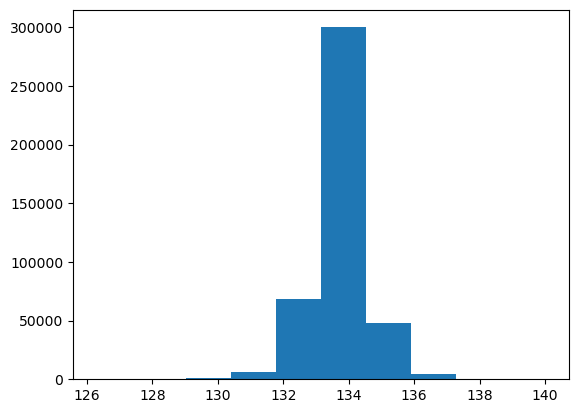

In [5]:
print(depth.mean(), depth.std())
plt.hist(np.ravel(depth.detach().numpy()));

In [6]:
device = 'cpu'
dpgan = DPGAN(device)
dpgan.to(device)

DPGAN(
  (DepthNet): DepthNet(
    (encoder): ResnetEncoder(
      (encoder): ResNet(
        (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
        (layer1): Sequential(
          (0): Bottleneck(
            (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
            (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
            (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
            (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, t

In [7]:
img_transform = transforms.Compose([
        transforms.ToTensor(),
])
# input_dir = '/Users/dingkeyi/Downloads/data/depth_selection/val_selection_cropped-small/image_small'
input_dir = './images'
dataset = DepthDataset(input_dir, img_transform)

dataloader = DataLoader(dataset, batch_size=1, shuffle=False)

In [8]:
torch.cuda.empty_cache()
dpgan.train_model(dataloader,1,50)

Training epoch 0 of 50
Generator loss: 0.11626830697059631, Discriminator loss: 1.399631381034851
---------------------------------------------------------
Training epoch 1 of 50
Generator loss: 0.11609801650047302, Discriminator loss: 4.827982593269553e-06
---------------------------------------------------------
Training epoch 2 of 50
Generator loss: 0.11594179272651672, Discriminator loss: 1.0848076271940954e-05
---------------------------------------------------------
Training epoch 3 of 50
Generator loss: 0.11579328030347824, Discriminator loss: 7.575907511636615e-05
---------------------------------------------------------
Training epoch 4 of 50
Generator loss: 0.11565585434436798, Discriminator loss: 0.0007828337838873267
---------------------------------------------------------
Training epoch 5 of 50
Generator loss: 0.11555582284927368, Discriminator loss: 0.005919788032770157
---------------------------------------------------------
Training epoch 6 of 50
Generator loss: 0.115

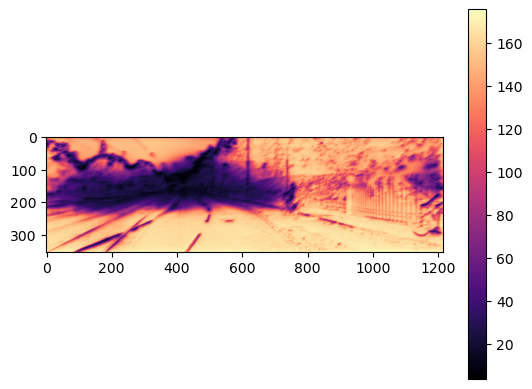

In [ ]:
img = Image.open("images/2.png")
transform = transforms.Compose([
    transforms.Resize((352,1216)),
    transforms.ToTensor(),
])
img = transform(img)
img = img[None, :, :, :]

depth = dpgan.DepthNet(img)
depth = torch.squeeze(depth, dim=0)

cb = plt.imshow(np.transpose(depth.detach().numpy(), (1,2,0)), cmap="magma")
plt.colorbar(cb)